In [1]:
from PIL import Image
from pytesseract import pytesseract
import cv2
from matplotlib import pyplot as plt

#### Page segmentation modes:
#####  0    Orientation and script detection (OSD) only.
#####  1    Automatic page segmentation with OSD.
#####  2    Automatic page segmentation, but no OSD, or OCR.
#####  3    Fully automatic page segmentation, but no OSD. (Default)
#####  4    Assume a single column of text of variable sizes.
#####  5    Assume a single uniform block of vertically aligned text.
#####  6    Assume a single uniform block of text.
#####  7    Treat the image as a single text line.
#####  8    Treat the image as a single word.
#####  9    Treat the image as a single word in a circle.
##### 10    Treat the image as a single character.
##### 11    Sparse text. Find as much text as possible in no particular order.
##### 12    Sparse text with OSD.
##### 13    Raw line. Treat the image as a single text line,
#####                        bypassing hacks that are Tesseract-specific.

#### OCR Engine modes:
#####  0    Legacy engine only.
#####  1    Neural nets LSTM engine only.
#####  2    Legacy + LSTM engines.
#####  3    Default, based on what is available.

In [2]:
# Load in image, convert to grayscale, and threshold
#img = Image.open('/mnt/c/Users/Danny/Downloads/receipt-template-us-mono-black-750px.png')
img = cv2.imread("/mnt/c/Users/Danny/Downloads/receipt-template-us-mono-black-750px.png")

In [3]:
height, width, _ = img.shape

In [4]:
config = r"--psm 11 --oem 3"
boxes = pytesseract.image_to_boxes(img, config=config)


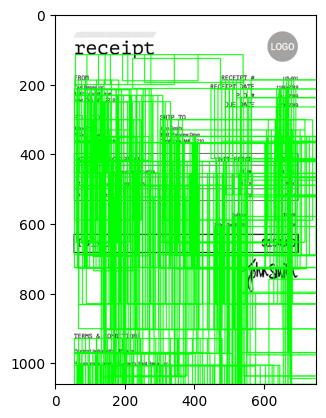

In [5]:
for box in boxes.splitlines():
    box = box.split(" ")
    img = cv2.rectangle(img, (int(box[1]), height - int(box[2] ), int(box[3]), height - int(box[4])), (0, 255, 0), 2)

plt.imshow(img)

In [8]:
img = cv2.imread("/mnt/c/Users/Danny/Downloads/receipt-template-us-mono-black-750px.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray,(5,5),0)

ret, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV) 

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                cv2.CHAIN_APPROX_NONE) 

for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 

    roi = thresh1[y:y+h, x:x+w]

    text = pytesseract.image_to_string(roi)
    
    # Print the text
    print(text)
    
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

sa eedapeneKcensenl ox teenth alice cealin

Le cee Leeman aad

TERMS & CONDITIONS

shen \E

he At





2 bt
ait)

ary
3 Patt cry

 

F cbanel
Bd
Le aioe neice

Flamed
ad
Deion eehe ia)

SHIP TO

CL) (hae

Do
Parry

RECEIPT #
RECEIPT DATE
re

QUE DATE

teal
L eohenanienal

 

Le ehh)

receipt




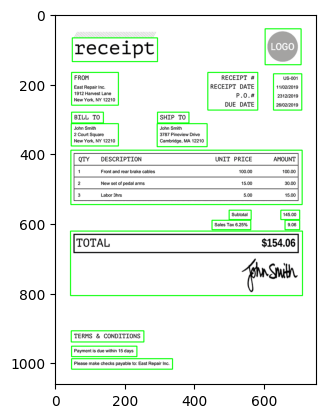

In [9]:
plt.imshow(img)